In [3]:
import pandas as pd
from pathlib import Path

# Path to data
bbc_path = Path("../data/bbc")

texts = []
labels = []

for category in bbc_path.iterdir():
    if category.is_dir():
        for file in category.glob("*.txt"):
            with open(file, "r", encoding="utf-8", errors="ignore") as f:
                texts.append(f.read().strip())
                labels.append(category.name)

# Create DataFrame
df = pd.DataFrame({"text": texts, "category": labels})
df.head(10)


,text,category
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
3,Snicket tops US box office chart\n\nThe film a...,entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment
5,'Landmark movies' of 2004 hailed\n\nUS film pr...,entertainment
6,Pete Doherty misses bail deadline\n\nSinger Pe...,entertainment
7,Fockers retain film chart crown\n\nComedy Meet...,entertainment
8,Top gig award for Scissor Sisters\n\nNew York ...,entertainment
9,"Johnny Depp: The acting outlaw\n\nJohnny Depp,...",entertainment


<Axes: title={'center': 'Class Distribution'}, xlabel='category'>

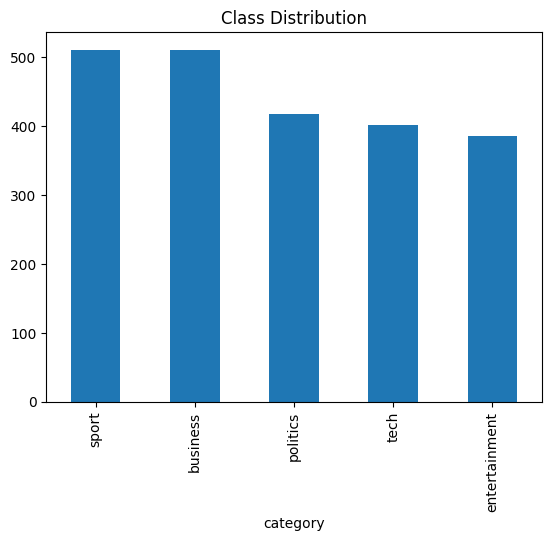

In [2]:
df['category'].value_counts().plot(kind='bar', title="Class Distribution")

In [4]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))
df["word_count"].describe()

count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: word_count, dtype: float64

/Users/maidawa/Desktop/Damags/Projects/bbc_news_classifier/bbc_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


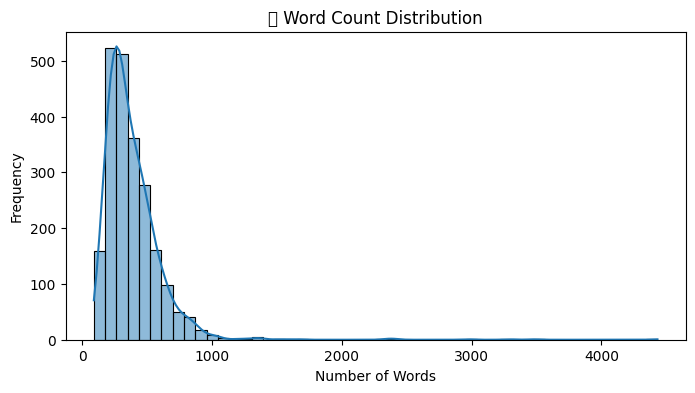

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df["word_count"], bins=50, kde=True)
plt.title("📝 Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [6]:
print("🧼 Null values:\n", df.isnull().sum())
print("🧹 Duplicates:", df.duplicated().sum())

🧼 Null values:
 text          0
category      0
word_count    0
dtype: int64
🧹 Duplicates: 98


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
print("🧼 Null values:\n", df.isnull().sum())
print("🧹 Duplicates:", df.duplicated().sum())

🧼 Null values:
 text          0
category      0
word_count    0
dtype: int64
🧹 Duplicates: 0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["category"], test_size=0.2, random_state=42
)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print("✅ TF-IDF vectorization complete.")
print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)

✅ TF-IDF vectorization complete.
Train shape: (1701, 5000)
Test shape: (426, 5000)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

accuracy = model.score(X_test_vec, y_test)
print(f"🎯 Test Accuracy: {accuracy:.2%}")

🎯 Test Accuracy: 96.71%


In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.96      0.94      0.95       108
entertainment       0.99      0.97      0.98        74
     politics       0.95      1.00      0.98        80
        sport       0.98      1.00      0.99        91
         tech       0.96      0.93      0.94        73

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426



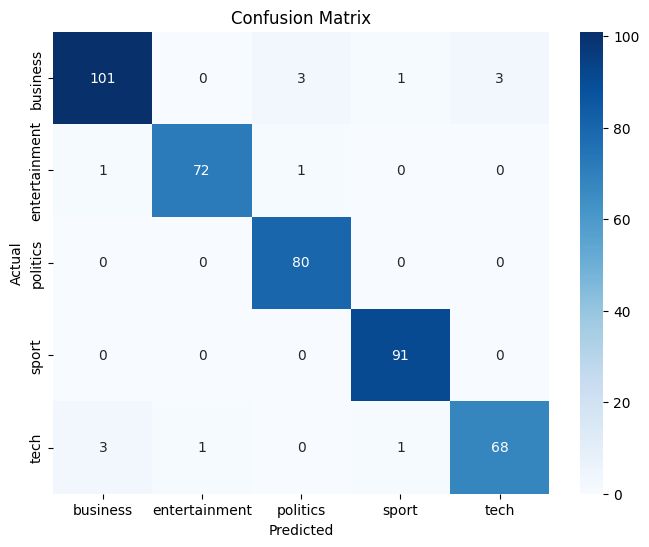

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
y_test.value_counts(normalize=True)

category
business         0.253521
sport            0.213615
politics         0.187793
entertainment    0.173709
tech             0.171362
Name: proportion, dtype: float64